# Лабораторная работа 3

Деревья решений. Классификатор пола по голосу

Автор: Крючкова А.С ИВТ 1-2

# Импорт библиотек и начальные действия

In [18]:
%pip install pandas matplotlib seaborn numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn import model_selection 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Чтение данных
voice_data = pd.read_csv('./data/voice_gender.csv')
print(voice_data.head())

# Проверка на наличие пропусков
print(f"Количество пропущенных: {voice_data.isnull().sum().sum()}")

# Факторы и целевой признак
features = voice_data.drop('label', axis=1).columns
X, y = voice_data[features], voice_data['label']

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Тренировочная выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

# Модель DecisionTreeClassifier с глубиной 1

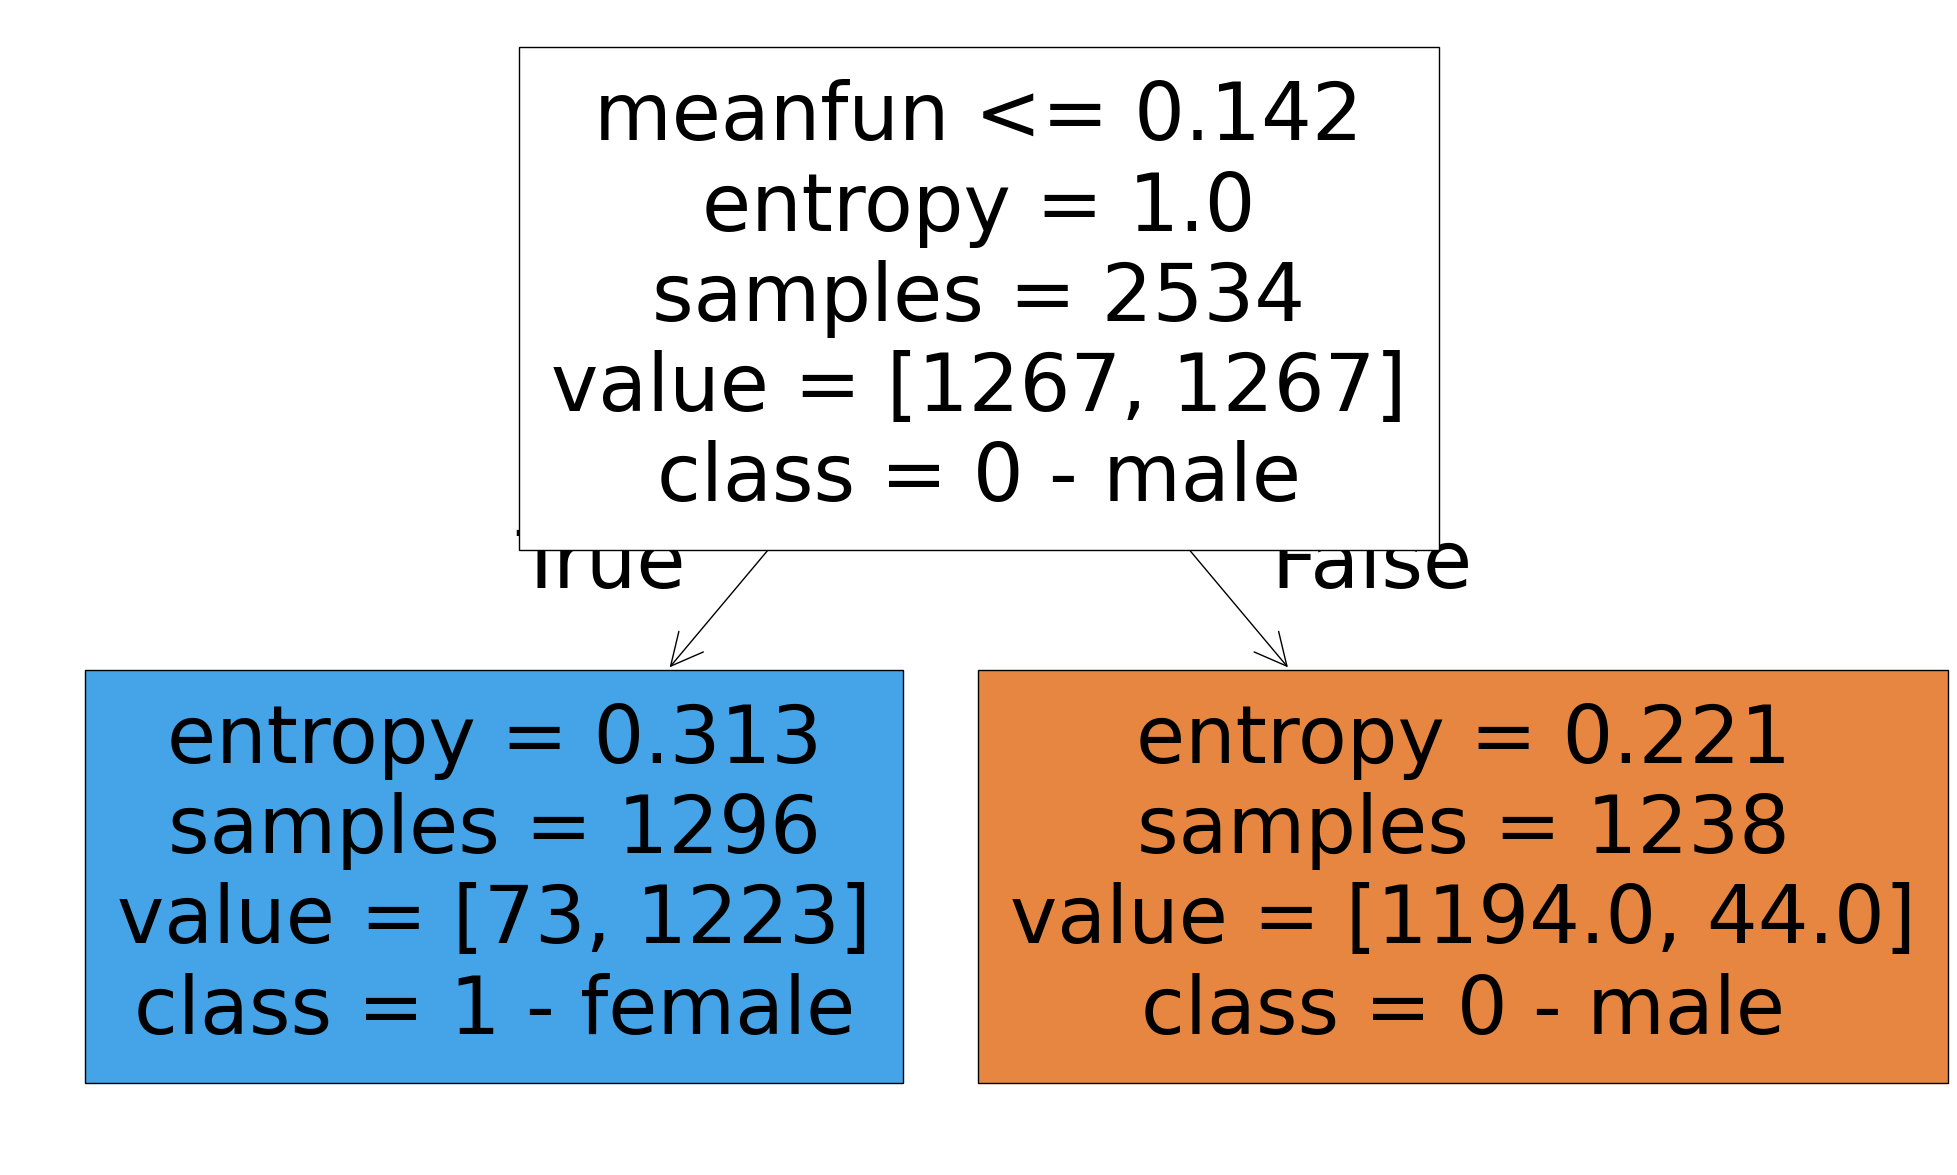

Точность модели с глубиной 1: 0.956


In [21]:
model_depth1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)
model_depth1.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_depth1, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

y_pred_depth1 = model_depth1.predict(X_test)
accuracy_depth1 = accuracy_score(y_test, y_pred_depth1)
print("Точность модели с глубиной 1:", round(accuracy_depth1, 3))

# Модель DecisionTreeClassifier с глубиной 2

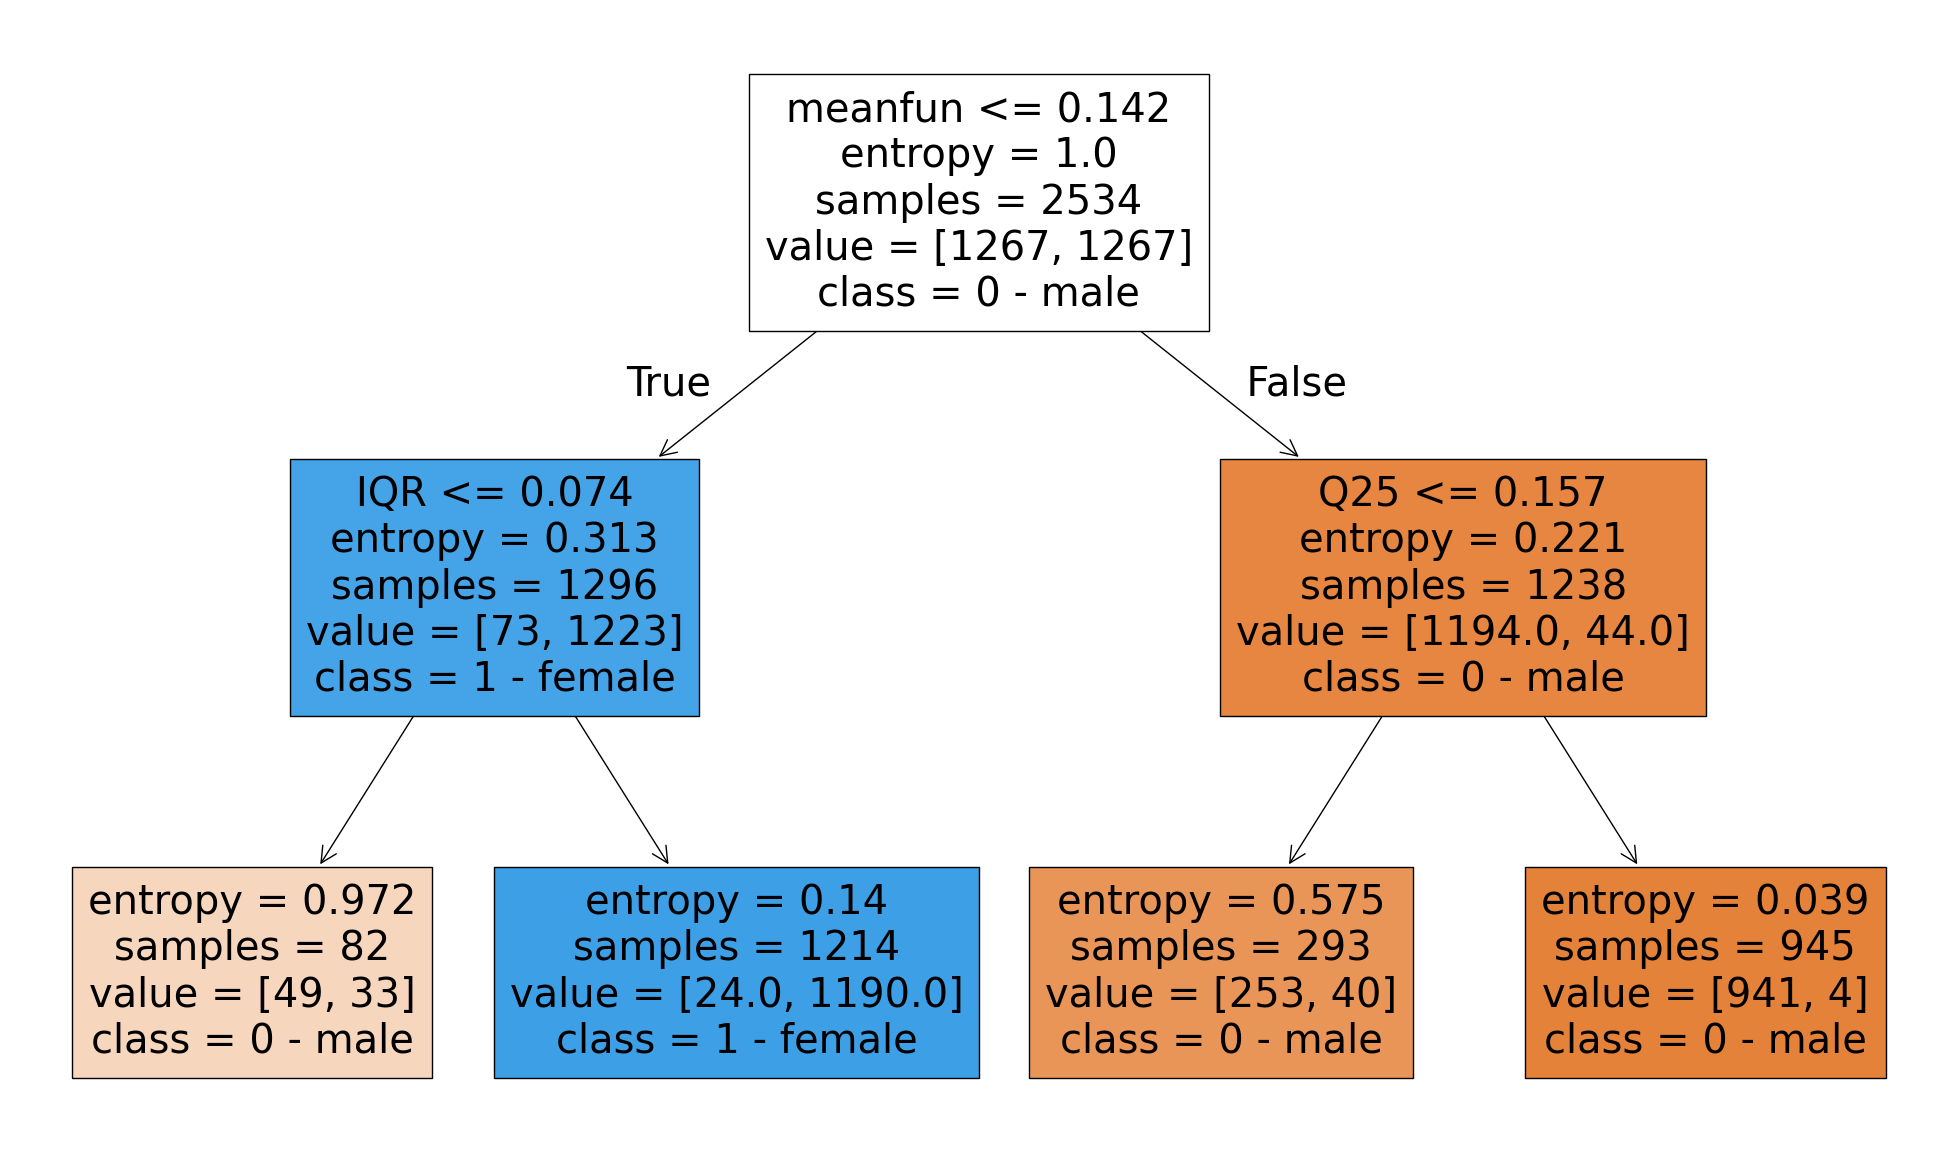

Точность модели с глубиной 2: 0.962


In [22]:
# Создаём и обучаем модель DecisionTreeClassifier с глубиной 2
model_depth2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
model_depth2.fit(X_train, y_train)

# Визуализируем модель
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_depth2, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

# Предсказание на тестовой выборке и оценка точности
y_pred_depth2 = model_depth2.predict(X_test)
accuracy_depth2 = accuracy_score(y_test, y_pred_depth2)
print("Точность модели с глубиной 2:", round(accuracy_depth2, 3))

# Свободная модель

Глубина дерева: 12
Количество листьев: 54


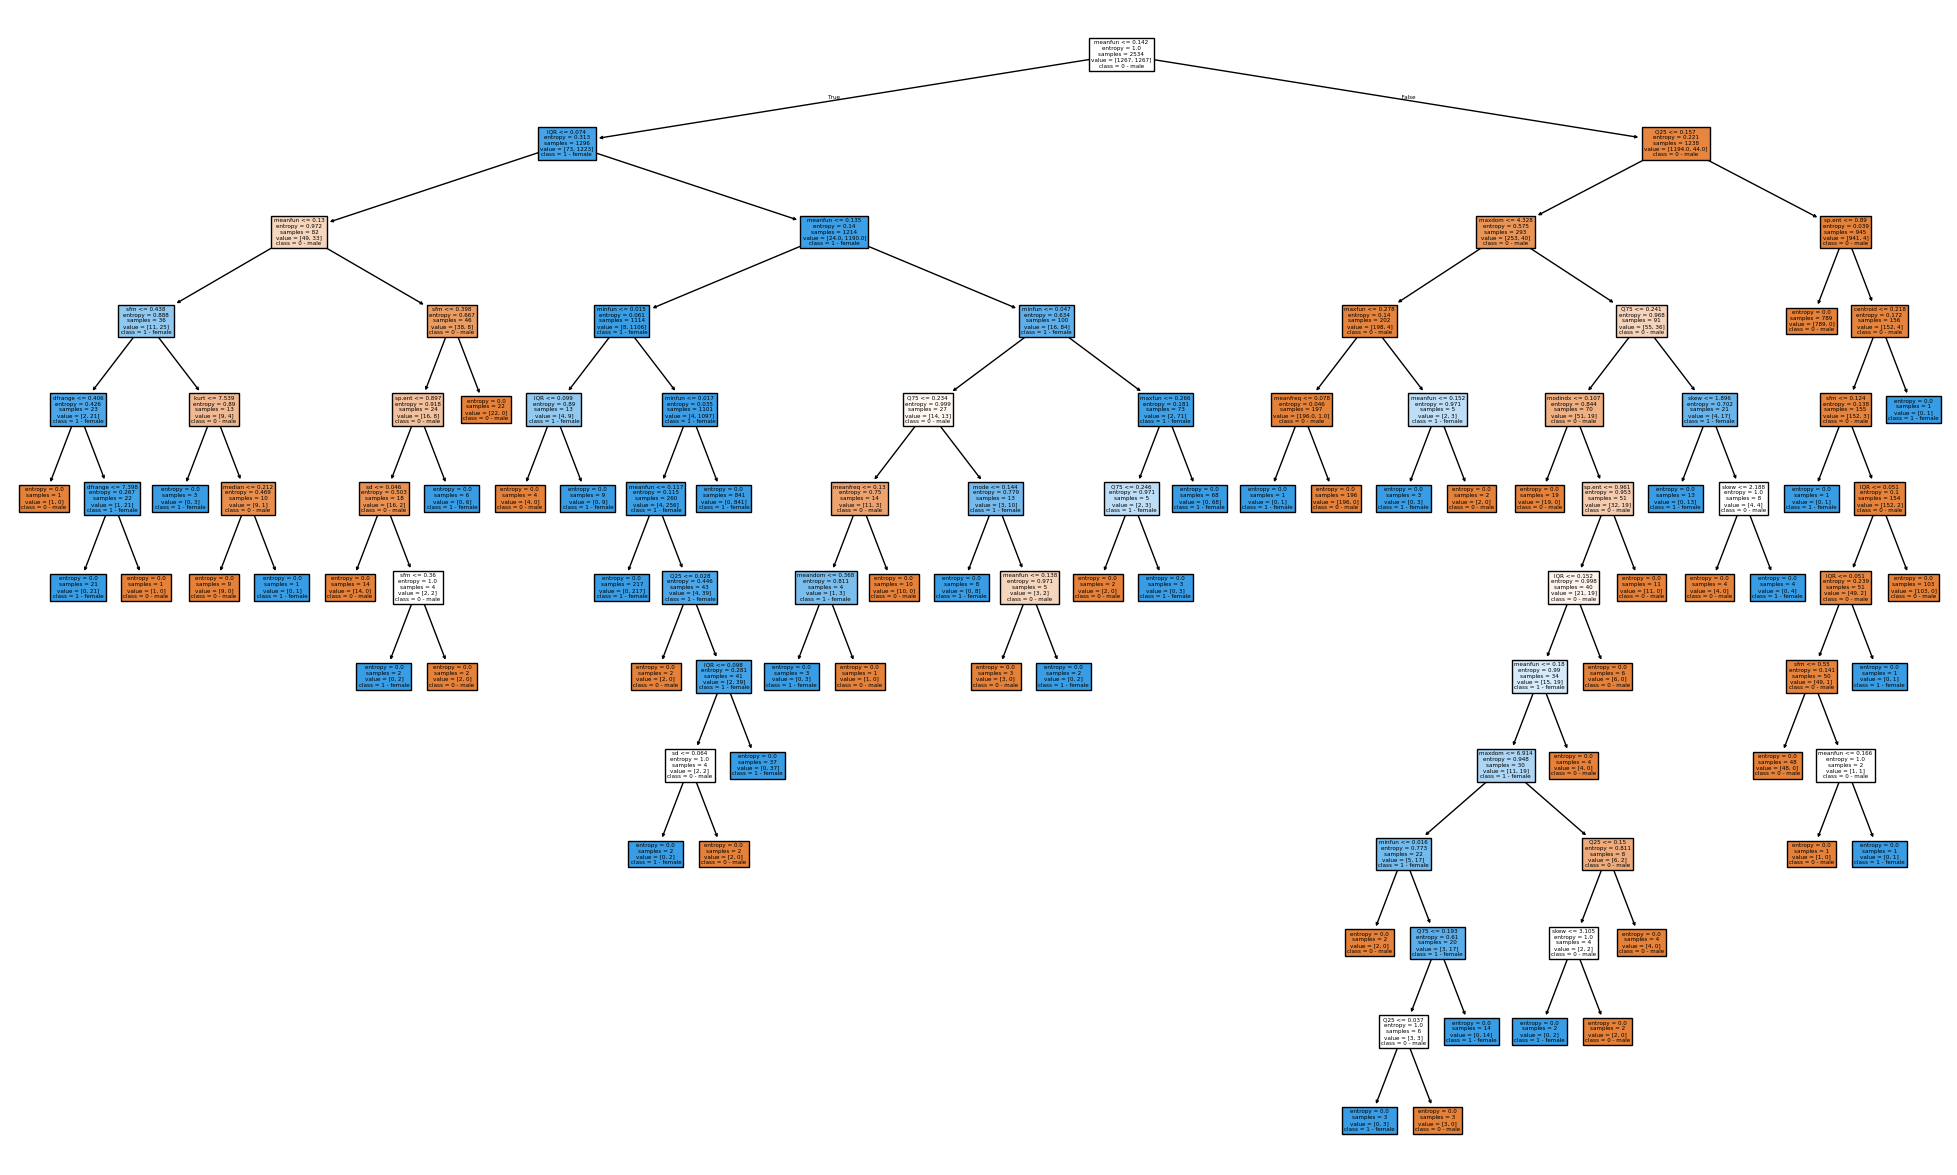

Точность свободной модели на тестовой выборке: 0.973
Точность свободной модели на тренировочной выборке: 1.0


In [23]:
# Создаём и обучаем свободную модель DecisionTreeClassifier
model_unrestricted = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
model_unrestricted.fit(X_train, y_train)

# Исследование параметров модели
depth = model_unrestricted.get_depth()
n_leaves = model_unrestricted.get_n_leaves()
print(f'Глубина дерева: {depth}')
print(f'Количество листьев: {n_leaves}')

# Визуализируем модель
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_unrestricted, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

# Предсказание на тестовой и тренировочной выборках и оценка точности
y_pred_unrestricted_test = model_unrestricted.predict(X_test)
y_pred_unrestricted_train = model_unrestricted.predict(X_train)
accuracy_unrestricted_test = accuracy_score(y_test, y_pred_unrestricted_test)
accuracy_unrestricted_train = accuracy_score(y_train, y_pred_unrestricted_train)
print("Точность свободной модели на тестовой выборке:", round(accuracy_unrestricted_test, 3))
print("Точность свободной модели на тренировочной выборке:", round(accuracy_unrestricted_train, 3))

# Поиск оптимальных гиперпараметров с помощью GridSearchCV

In [24]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10]
}
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Лучшие параметры:", best_params)
print("Лучшая оценка модели:", best_score)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}
Лучшая оценка модели: 0.9660632566987083


# Создаём и обучаем оптимальную модель DecisionTreeClassifier

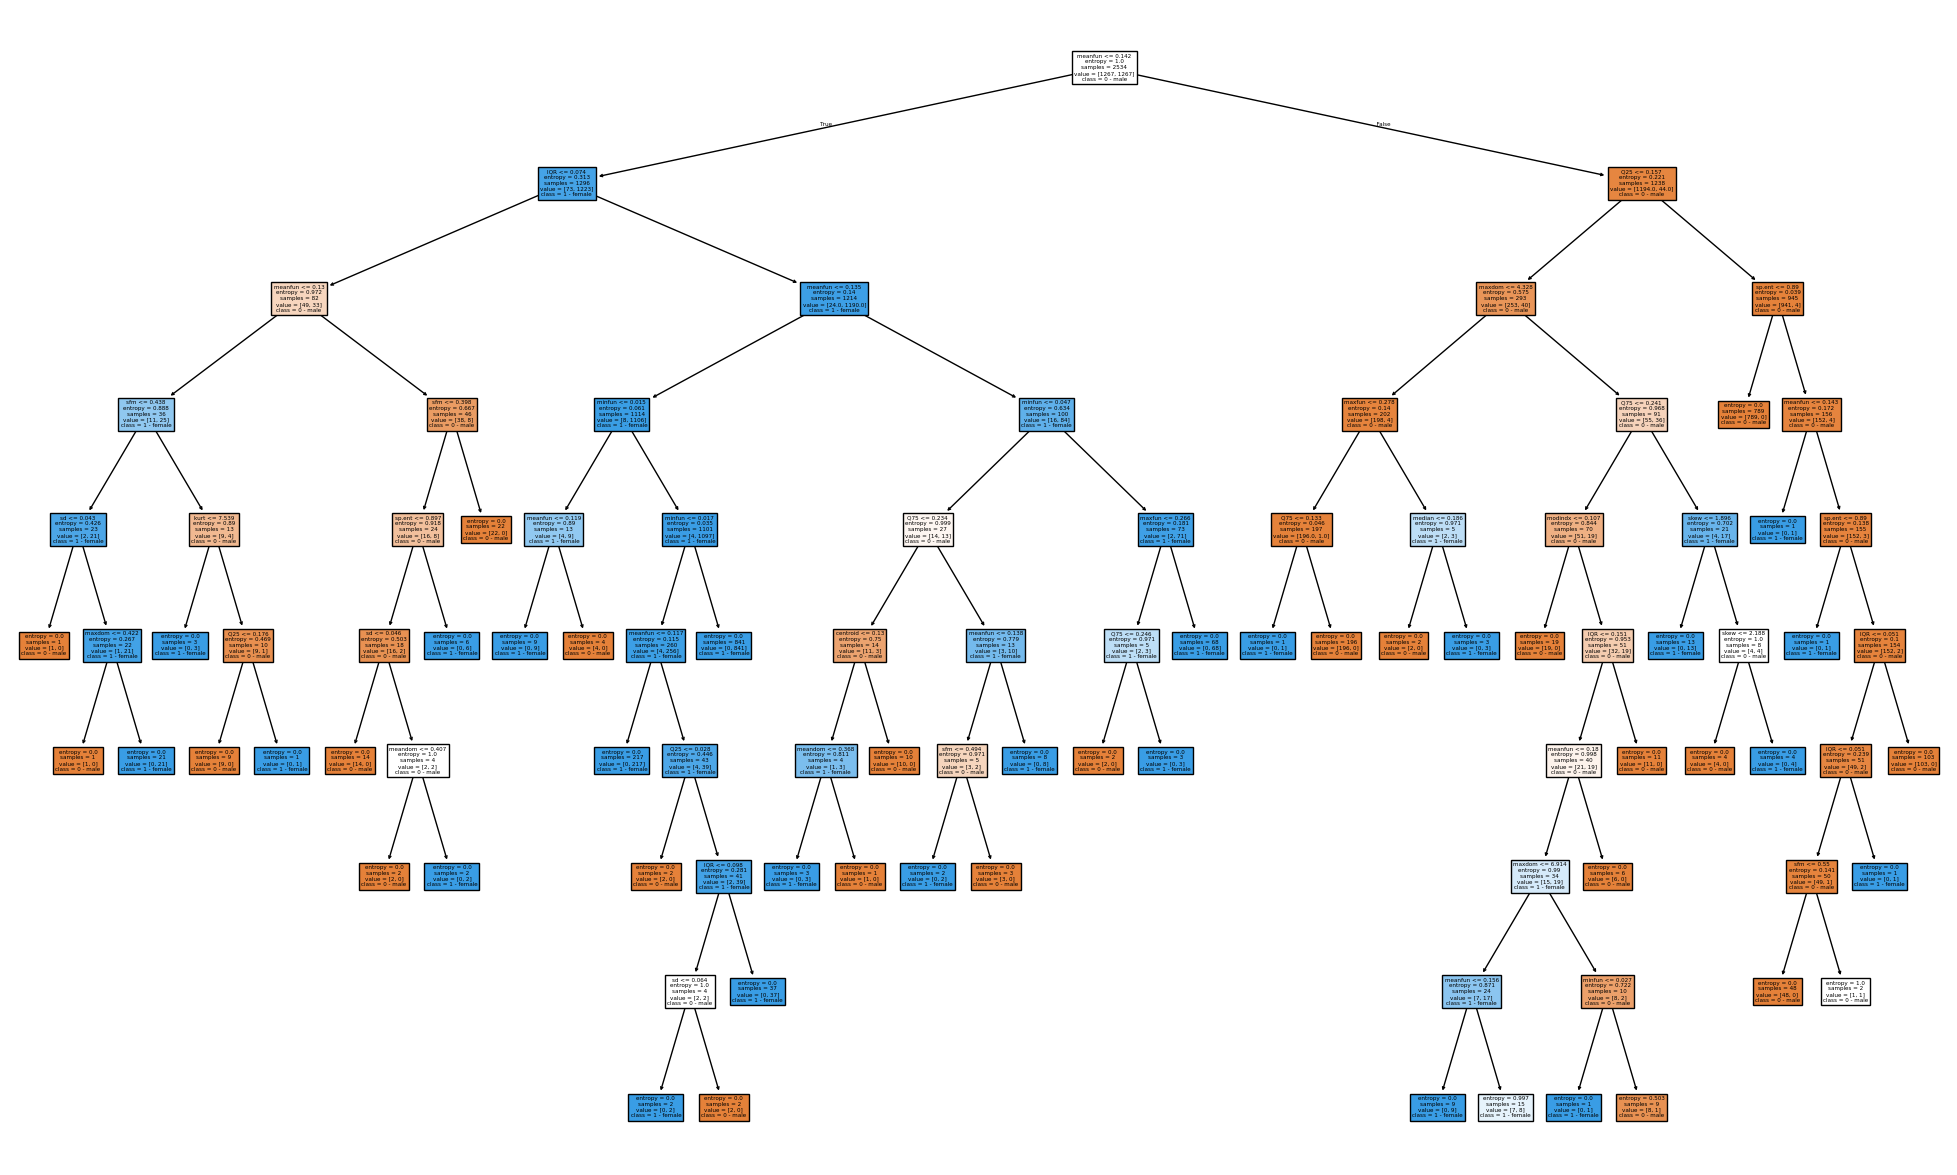

Точность оптимальной модели на тестовой выборке: 0.968
Точность оптимальной модели на тренировочной выборке: 0.996


In [25]:
model_best = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
model_best.fit(X_train, y_train)

# Визуализируем модель
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_best, feature_names=X.columns, class_names=["0 - male", "1 - female"], filled=True, ax=ax)
plt.show()

# Предсказание на тестовой и тренировочной выборках и оценка точности
y_pred_best_test = model_best.predict(X_test)
y_pred_best_train = model_best.predict(X_train)
accuracy_best_test = accuracy_score(y_test, y_pred_best_test)
accuracy_best_train = accuracy_score(y_train, y_pred_best_train)
print("Точность оптимальной модели на тестовой выборке:", round(accuracy_best_test, 3))
print("Точность оптимальной модели на тренировочной выборке:", round(accuracy_best_train, 3))

# Важность факторов

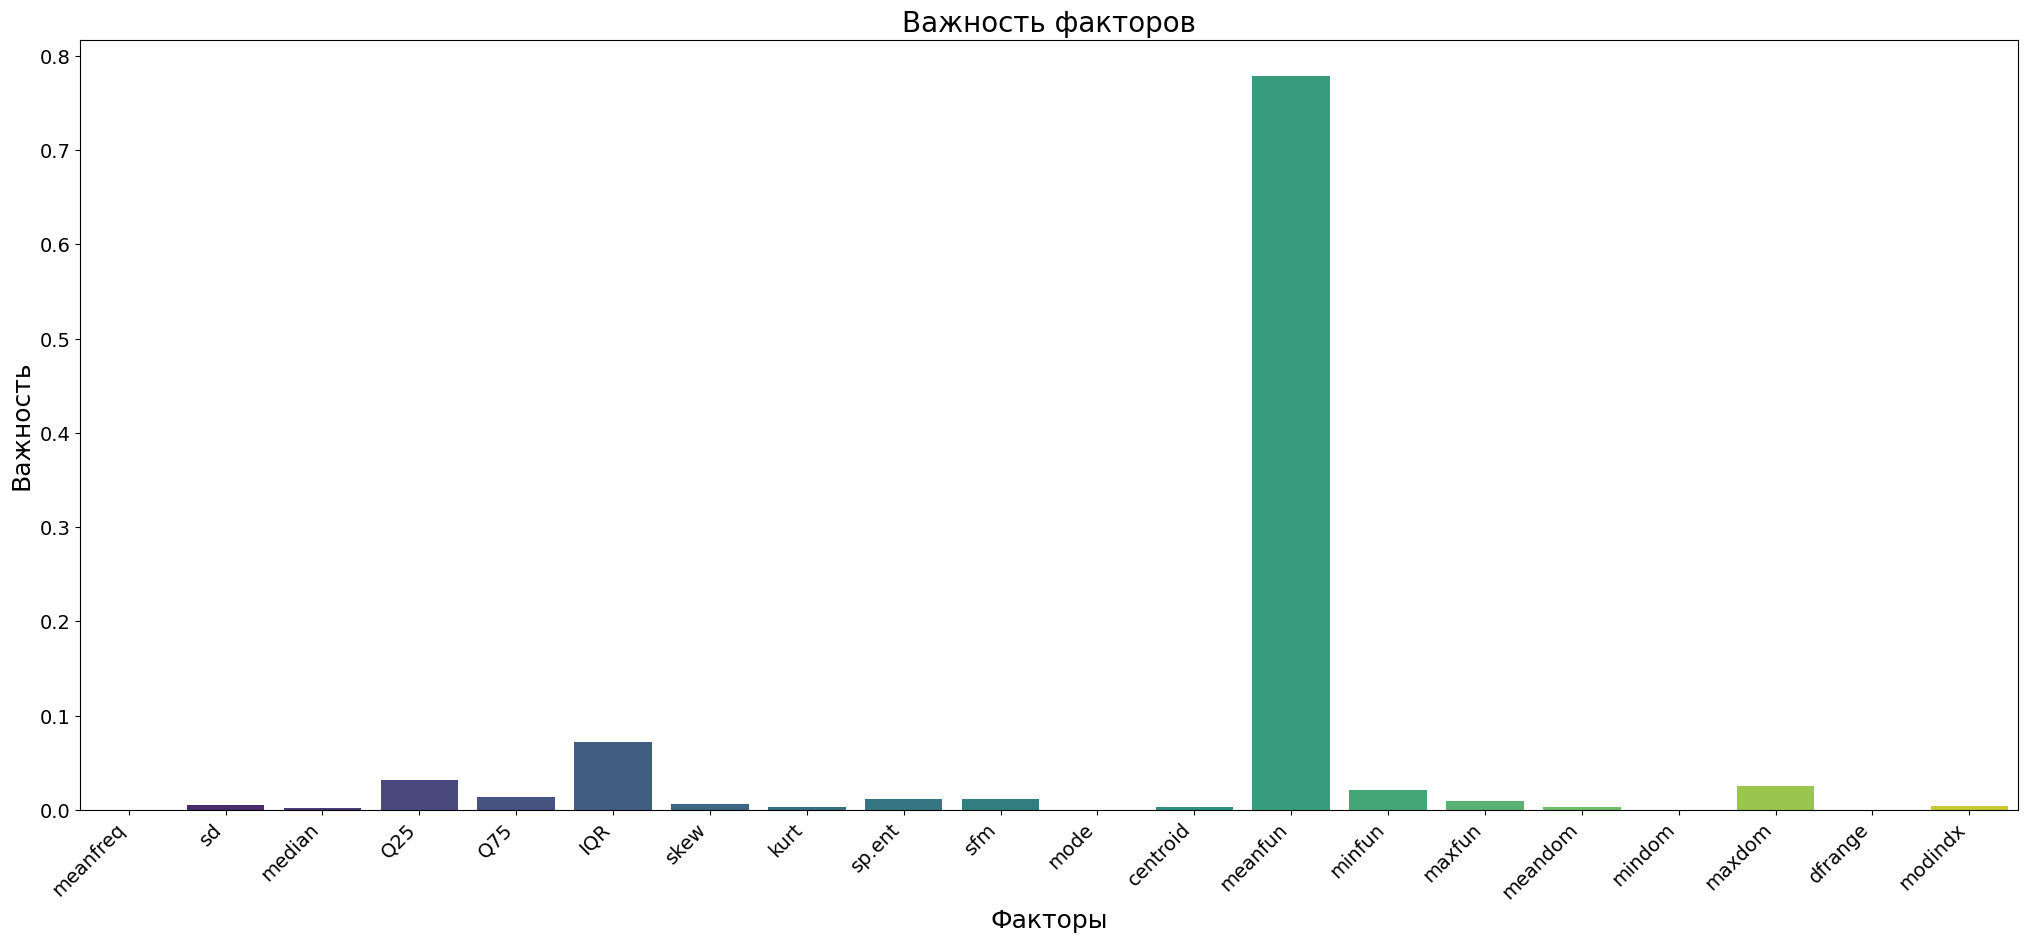

In [26]:
feature_importances = model_best.feature_importances_
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=features, y=feature_importances, ax=ax, palette="viridis")
ax.set_title('Важность факторов', fontsize=20)
ax.set_xlabel('Факторы', fontsize=18)
ax.set_ylabel('Важность', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()


1. meanfun
2. IQR
3. Q25